In [1]:
import pandas as pd

In [2]:
from xls2dict import xls2dict
from derive01 import derive

In [ ]:
xls1= xls2dict()

или:

In [3]:
xls2 = xls2dict('/notebooks/arinas/2017_02_10/Creep.xls')

File '/notebooks/arinas/2017_02_10/Creep.xls' readed successfully!


In [4]:
sheets=sorted(xls2.data, key=lambda x: int(x.split(u'°C')[0]))

In [5]:
from math import isnan
def cregion(df,col):
    for _j in range(4,df.shape[0]):
        if isnan(df.iloc[_j,col]): return (df.iloc[4:_j,col].values,df.iloc[4:_j,col+1].values)
        else: _j+=1

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=[12., 8.]

In [ ]:
for _ in sheets:
    dxy =xls2.data[_]
    plt.title(_)
    for _c in range(0,dxy.shape[1],3):
        cr = cregion(dxy,_c)
        plt.plot(cr[0], cr[1],'-')
    plt.show()

In [13]:
def fivepoint(x,y):
    lenx = len(x)
    for _j in range(lenx):
        if _j<2:
            yield (-25.*y[_j] +48.*y[_j+1] -36.*y[_j+2] +16.*y[_j+3] -3.*y[_j+4])/((x[_j+4]-x[_j])*3.)
        elif _j>(lenx-3):
            yield (25.*y[_j] -48.*y[_j-1] +36.*y[_j-2] -16.*y[_j-3] +3.*y[_j-4])/((x[_j]-x[_j-4])*3.)
        else:
            yield (y[_j-2] -8.*y[_j-1] +8.*y[_j+1] -y[_j+2])/((x[_j+2]-x[_j-2])*3.)

In [7]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [8]:
def plots_view(x):
    yx =xls2.data[x]
    plots = ["%s:%d" % (yx.iloc[1,_],_) for _ in range(1,yx.shape[1],3)]
    w2.options=plots

w1 = widgets.Select(options=sheets)
yx =xls2.data[w1.value]
plots = ["%s:%d" % (yx.iloc[1,_],_) for _ in range(1,yx.shape[1],3)]
w2 = widgets.Select(options=plots)

i = interactive(plots_view,x=w1)
j = interactive(lambda x:x, x=w2)


display(i,j);

'248:10'

In [9]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly
import plotly.graph_objs as go

yx = xls2.data[w1.value]
oneplot = w2.value.split(':')
cr = cregion(yx, int(oneplot[1])-1)
dydx = np.array([_ for _ in derive(cr[0], cr[1],step=5,cutoff=0, cutoff_s=0)])

In [10]:
trace1 = go.Scatter(
    x=dydx[:,1]/np.abs(dydx[:,1]).max(),
    y=dydx[:,0]
)
data = [trace1,]
layout = go.Layout(
    xaxis=dict(
        autorange=True
    ),
    yaxis=dict(
        type='log',
        autorange=True
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
%matplotlib notebook
#oneplot in onesheet
yx = xls2.data[w1.value]
oneplot = w2.value.split(':')
cr = cregion(yx, int(oneplot[1])-1)
dydx = [_ for _ in fivepoint(cr[0], cr[1])]
plt.title("%s [%s:%s]" % (w1.value,oneplot[0],oneplot[1]))
plt.semilogy(cr[0]/np.abs(cr[0]).max(), dydx,'-')

In [ ]:
#all plots in onesheet
yx =xls2.data[onesheet]
plt.title(onesheet)
for _c in range(0,yx.shape[1],3):
    cr = cregion(yx,_c)
    dydx = [_ for _ in fivepoint(cr[0], cr[1])]
    plt.semilogy(cr[0]/np.abs(cr[0]).max(), dydx,'-')
plt.show()

In [ ]:
%matplotlib??

In [ ]:
#import fivepoint
for _ in sheets:
    yx =xls2.data[_]
    plt.title(_)
    for _c in range(0,yx.shape[1],3):
        cr = cregion(yx,_c)
        dydx = [_ for _ in fivepoint(cr[0], cr[1])]
        plt.semilogy(cr[0]/np.abs(cr[0]).max(), dydx,'-')
    plt.show()

In [11]:
xx =np.linspace(-5,5,201)
yy = xx**2 + 10*np.sin(xx)

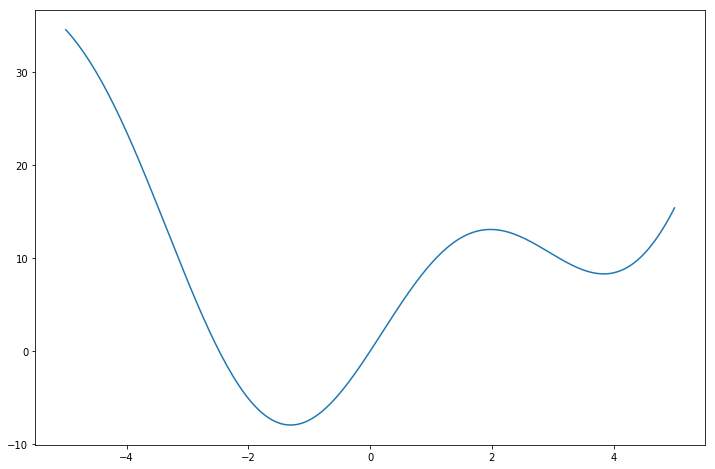

In [16]:
plt.plot(xx,yy);

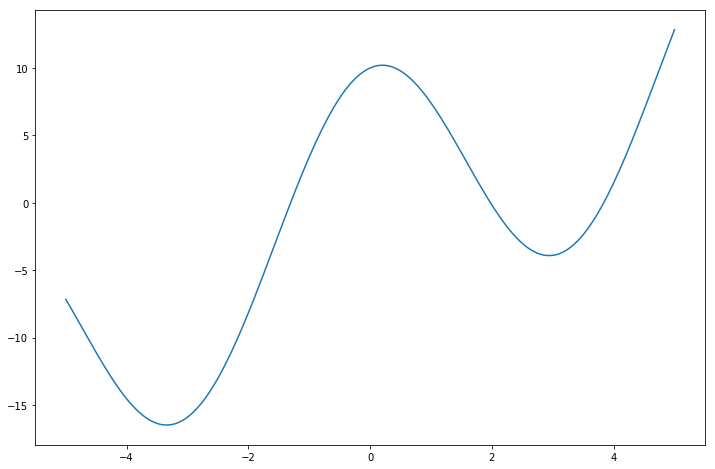

In [15]:
plt.plot(xx,[_ for _ in fivepoint(xx,yy)]);

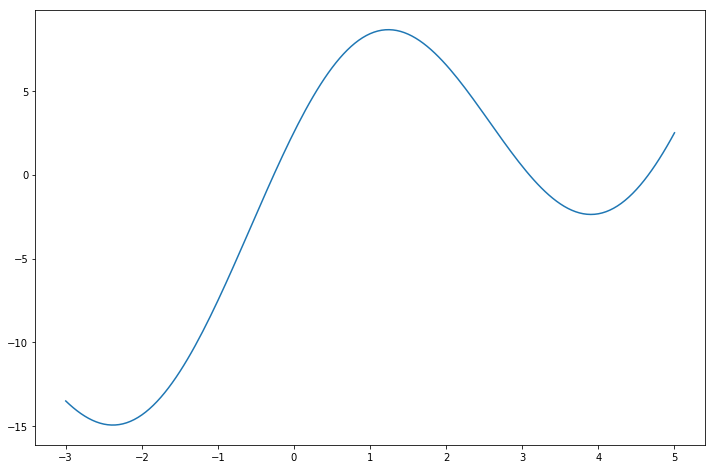

In [19]:
dydx = np.array([_ for _ in derive(xx, yy,step=40,cutoff=0, cutoff_s=0)])
plt.plot(dydx[:,1],dydx[:,0]);

<IPython.core.display.Javascript object>


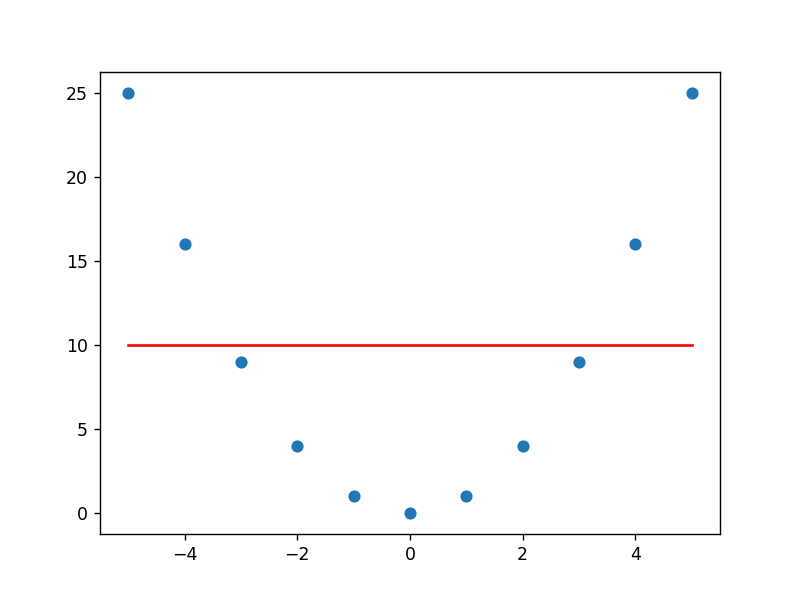

y=-0.000000x+(10.000000)


In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# plot the data itself
x = [_ for _ in range(-5,6)]
y = [_*_ for _ in range(-5,6)]
plt.plot(x,y,'o')
# calc the trendline (it is simply a linear fitting)
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
plt.plot(x,p(x),'r-')
# the line equation:
print "y=%.6fx+(%.6f)" % (z[0],z[1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 10)
number = 5
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=1):
    plt.plot(x, i * x + i, color=color, label='$y = {i}x + {i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


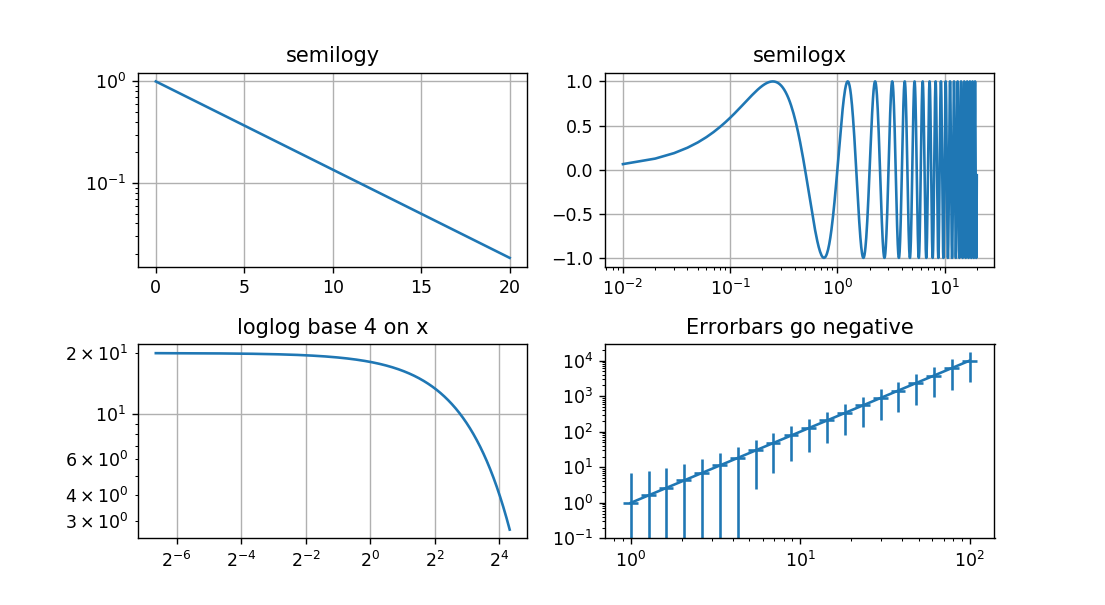

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 4 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

In [4]:
import scipy
scipy.__version__

'0.18.1'